## Real Estate Model Building

## 1. Import sklearn Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [3]:
mum_prop = pd.read_csv('../Dataset/Egyption.csv')
mum_prop

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
0,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar,high Price
1,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha,Mid Price
2,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City,Mid Price
3,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
4,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price
...,...,...,...,...,...,...,...,...,...,...,...
16053,Twin House,12284000,4,4,337,No,0,Cash or Installment,Not Finished,Sheikh Zayed,high Price
16054,Stand Alone Villa,16500000,4,4,620,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
16055,Stand Alone Villa,16000000,5,5,530,No,0,Cash,Finished,New Cairo - El Tagamoa,high Price
16056,Stand Alone Villa,4800000,4,3,165,No,0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,high Price


## 3. Data Understanding

In [4]:
mum_prop.shape

(16058, 11)

In [5]:
mum_prop.info()
mum_prop.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16058 entries, 0 to 16057
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            16058 non-null  object
 1   Price           16058 non-null  int64 
 2   Bedrooms        16058 non-null  int64 
 3   Bathrooms       16058 non-null  int64 
 4   Area            16058 non-null  int64 
 5   Furnished       16058 non-null  object
 6   Level           16058 non-null  int64 
 7   Payment_Option  16058 non-null  object
 8   Delivery_Term   16058 non-null  object
 9   City            16058 non-null  object
 10  Price_range     16058 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.3+ MB


,Price,Bedrooms,Bathrooms,Area,Level
Price,1.000000,0.520989,0.636456,0.685345,-0.217643
Bedrooms,0.520989,1.000000,0.797515,0.720963,-0.127501
Bathrooms,0.636456,0.797515,1.000000,0.740778,-0.203051
Area,0.685345,0.720963,0.740778,1.000000,-0.163978
Level,-0.217643,-0.127501,-0.203051,-0.163978,1.000000


In [6]:
mum_prop.isna().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Payment_Option    0
Delivery_Term     0
City              0
Price_range       0
dtype: int64

In [7]:
mum_prop.describe().round()

,Price,Bedrooms,Bathrooms,Area,Level
count,16058.0,16058.0,16058.0,16058.0,16058.0
mean,3783341.0,3.0,3.0,216.0,1.0
std,3386869.0,1.0,1.0,140.0,3.0
min,30000.0,1.0,1.0,25.0,0.0
25%,1311000.0,3.0,2.0,125.0,0.0
50%,2775000.0,3.0,3.0,175.0,0.0
75%,5250000.0,4.0,3.0,260.0,2.0
max,24000000.0,11.0,11.0,990.0,12.0


### 4- Data

### 4.1 Drop Unwanted Columns

In [8]:
mum_prop.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
0,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar,high Price
1,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha,Mid Price
2,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City,Mid Price
3,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
4,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price


In [9]:
print('Shape of data :', mum_prop.shape)

Shape of data : (16058, 11)


### 4.2 Label Encoding for Categorical Columns

In [10]:
le = LabelEncoder()

In [11]:
for column in mum_prop.describe(include='object').columns:
    mum_prop[column] = le.fit_transform(mum_prop[column])

In [12]:
mum_prop.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Type,16058.0,2.31,2.52,0.0,0.0,1.0,4.0,7.0
Price,16058.0,3783340.89,3386868.82,30000.0,1311000.0,2775000.0,5250000.0,24000000.0
Bedrooms,16058.0,3.15,1.08,1.0,3.0,3.0,4.0,11.0
Bathrooms,16058.0,2.72,1.21,1.0,2.0,3.0,3.0,11.0
Area,16058.0,216.01,140.26,25.0,125.0,175.0,260.0,990.0
Furnished,16058.0,0.10,0.30,0.0,0.0,0.0,0.0,1.0
Level,16058.0,1.32,2.60,0.0,0.0,0.0,2.0,12.0
Payment_Option,16058.0,0.92,0.89,0.0,0.0,1.0,1.0,3.0
Delivery_Term,16058.0,1.63,0.96,0.0,1.0,1.0,3.0,3.0
City,16058.0,48.92,21.30,0.0,43.0,54.0,60.0,85.0


In [13]:
mum_prop

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
0,0,4000000,3,3,160,0,11,0,1,19,2
1,0,2250000,3,2,165,0,1,0,1,78,1
2,0,1900000,3,2,230,0,10,0,1,53,1
3,0,5800000,2,3,160,0,0,0,3,54,2
4,0,1844900,4,3,222,0,1,1,3,54,1
...,...,...,...,...,...,...,...,...,...,...,...
16053,7,12284000,4,4,337,0,0,1,2,72,2
16054,4,16500000,4,4,620,0,0,0,3,54,2
16055,4,16000000,5,5,530,0,0,0,1,54,2
16056,4,4800000,4,3,165,0,0,1,3,54,2


In [14]:
mum_prop.info()
mum_prop.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16058 entries, 0 to 16057
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Type            16058 non-null  int32
 1   Price           16058 non-null  int64
 2   Bedrooms        16058 non-null  int64
 3   Bathrooms       16058 non-null  int64
 4   Area            16058 non-null  int64
 5   Furnished       16058 non-null  int32
 6   Level           16058 non-null  int64
 7   Payment_Option  16058 non-null  int32
 8   Delivery_Term   16058 non-null  int32
 9   City            16058 non-null  int32
 10  Price_range     16058 non-null  int32
dtypes: int32(6), int64(5)
memory usage: 1003.8 KB


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
Type,1.000000,0.525675,0.497777,0.573943,0.496232,-0.052804,-0.310045,0.038143,0.152085,0.101032,0.442817
Price,0.525675,1.000000,0.520989,0.636456,0.685345,-0.018301,-0.217643,-0.092752,0.074552,0.170525,0.732337
Bedrooms,0.497777,0.520989,1.000000,0.797515,0.720963,-0.103636,-0.127501,-0.056558,0.212793,0.109452,0.408088
Bathrooms,0.573943,0.636456,0.797515,1.000000,0.740778,-0.107498,-0.203051,-0.018797,0.234567,0.129717,0.530329
Area,0.496232,0.685345,0.720963,0.740778,1.000000,-0.070867,-0.163978,-0.123700,0.194602,0.100536,0.459500
Furnished,-0.052804,-0.018301,-0.103636,-0.107498,-0.070867,1.000000,-0.035282,-0.142237,-0.205222,-0.065924,-0.009504
Level,-0.310045,-0.217643,-0.127501,-0.203051,-0.163978,-0.035282,1.000000,-0.093071,0.001040,-0.013310,-0.157347
Payment_Option,0.038143,-0.092752,-0.056558,-0.018797,-0.123700,-0.142237,-0.093071,1.000000,0.095491,0.018283,-0.014941
Delivery_Term,0.152085,0.074552,0.212793,0.234567,0.194602,-0.205222,0.001040,0.095491,1.000000,0.039280,0.068238
City,0.101032,0.170525,0.109452,0.129717,0.100536,-0.065924,-0.013310,0.018283,0.039280,1.000000,0.160705


### 4.3 Looking for Minimum & Maximum

In [15]:
for i in mum_prop.columns:  
    print(i,'Min value :', mum_prop[i].min(),'Max value :', mum_prop[i].max())

Type Min value : 0 Max value : 7
Price Min value : 30000 Max value : 24000000
Bedrooms Min value : 1 Max value : 11
Bathrooms Min value : 1 Max value : 11
Area Min value : 25 Max value : 990
Furnished Min value : 0 Max value : 1
Level Min value : 0 Max value : 12
Payment_Option Min value : 0 Max value : 3
Delivery_Term Min value : 0 Max value : 3
City Min value : 0 Max value : 85
Price_range Min value : 0 Max value : 2


### 4.4 Correlation Heatmap

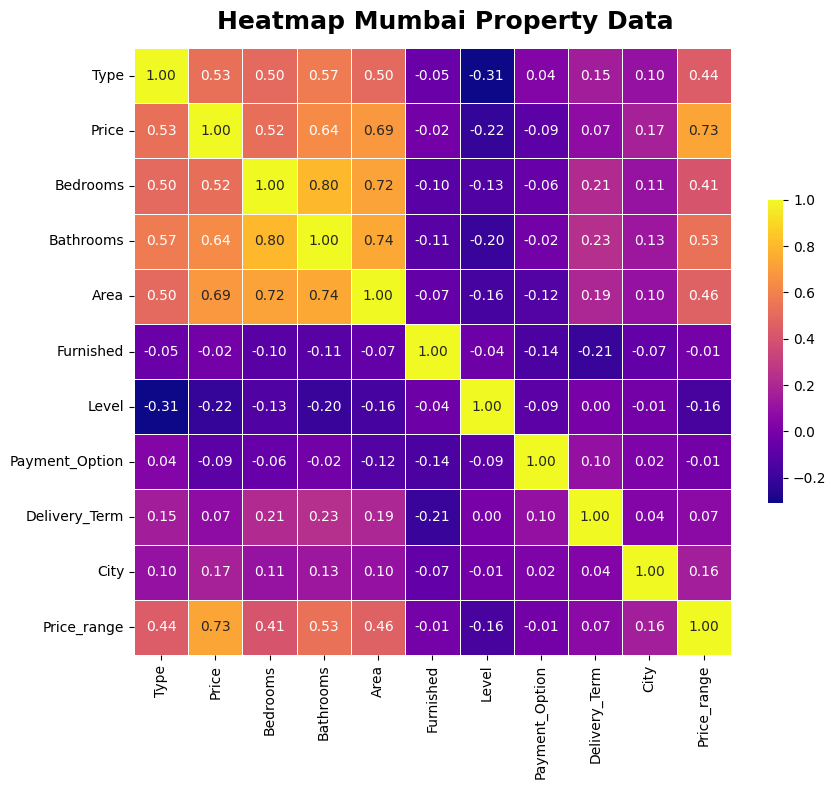

In [16]:
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(mum_prop.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='plasma')
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

## 5. Model Building

In [17]:
mum_prop.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
0,0,4000000,3,3,160,0,11,0,1,19,2
1,0,2250000,3,2,165,0,1,0,1,78,1
2,0,1900000,3,2,230,0,10,0,1,53,1
3,0,5800000,2,3,160,0,0,0,3,54,2
4,0,1844900,4,3,222,0,1,1,3,54,1


### 5.1 Train Test Split

In [18]:
X =  mum_prop.drop('Price', axis = 1)
y =  mum_prop['Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state = 20)

In [20]:
print(X_train.shape, X_test.shape)

(11240, 10) (4818, 10)


### 5.2 Linear Regression

In [21]:
linear = LinearRegression()
linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))


Training Accuracy =  0.7135751707690055
Test Accuracy     =  0.7006495408406921


In [22]:
# Calculate the prediction

train_predict = linear.predict(X_train)
test_predict = linear.predict(X_test)

print("Train Predict = ", train_predict)
print("Test Predict  = ", test_predict)

Train Predict =  [5715022.4636695  4569768.61176579 -228824.26577807 ... 5321761.49138126
 1317201.59796625 5574220.60855096]
Test Predict  =  [6941070.93165519 2954473.32495381 1634043.26856885 ... -205994.13317709
 1762952.86610085 6698903.27439078]


In [23]:
# Calculate loss function
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print("Training MSE = ", train_mse)
print("Test MSE     = ", test_mse)

Training MSE =  3254943157523.067
Test MSE     =  3507689909471.073


In [24]:
#Plotting the results
fig = px.scatter( x=y_test, y=test_predict, trendline="ols")
fig.show()

### 5.3 Decision Tree Regressor

In [25]:
dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  0.9936924408461281
Test Accuracy     =  0.7767616764945884


In [26]:
# Calculate the prediction

train_predict = dt.predict(X_train)
test_predict = dt.predict(X_test)

print("Train Predict = ", train_predict)
print("Test Predict  = ", test_predict)

Train Predict =  [5150000. 3375000.  900000. ... 4800000. 1790000. 7260000.]
Test Predict  =  [14000000.  2720000.  3000000. ...   270000.  1800000.  6500000.]


In [27]:
# Calculate loss function
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print("Training MSE = ", train_mse)
print("Test MSE     = ", test_mse)

Training MSE =  71679353230.96548
Test MSE     =  2615833017147.465


In [28]:
#Plotting the results
fig = px.scatter( x=y_test, y=test_predict, trendline="ols")
fig.show()

### 5.4 xgboost model

In [29]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

#train the model
xgb_reg.fit(X_train,y_train)

#make prediction on the test set
y_pred = xgb_reg.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test,y_pred)
print("Mean Squred Error : ",mse)

Mean Squred Error :  1765642845595.5032


In [30]:
from sklearn.metrics import r2_score

#calculate r-squared score of the model
score = r2_score(y_test,y_pred)
print(f"Model R-squared: {score}")

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
#Calculate mean absolote error (MAE)
mae = mean_absolute_error(y_test,y_pred)

#Calculate mean absolote percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test,y_pred)

print(f"mean absolote error(MAE): {mae}")
print(f"mean absolote percentage error(MAPE): {mape}") 

Model R-squared: 0.8493179242802393
mean absolote error(MAE): 792111.6825835409
mean absolote percentage error(MAPE): 0.2924964250279381


In [31]:
#Plotting the results
fig = px.scatter( x=y_test, y=test_predict, trendline="ols")
fig.show()

### 5.4 Polynomial Features

### Polynomial Features with LinearRegression

In [32]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.771398342592653
Test Accuracy     =  0.7582363739931832


In [33]:
# Calculate the prediction

train_predict = poly_model.predict(X_train)
test_predict = poly_model.predict(X_test)

print("Train Predict = ", train_predict)
print("Test Predict  = ", test_predict)

Train Predict =  [5929035.0127425  3936285.07853338  587023.72007505 ... 4578215.7394653
 1867715.26100189 5712977.55980511]
Test Predict  =  [7986160.20690883 2684259.46351886 1192409.48780839 ...  592765.96969036
 1689837.88119879 7126487.33825521]


In [34]:
# Calculate loss function
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print("Training MSE = ", train_mse)
print("Test MSE     = ", test_mse)

Training MSE =  2597838331873.072
Test MSE     =  2832906399418.4326


In [35]:
#Plotting the results
fig = px.scatter( x=y_test, y=test_predict, trendline="ols")
fig.show()

### Polynomial Features with RandomForestRegressor

In [36]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=20, random_state = 20))])
poly_model.fit(X_train, y_train)

train_score = poly_model.score(X_train,y_train)
test_score = poly_model.score(X_test,y_test)
# Calculate the Score
print("Training Accuracy = ", train_score)
print("Test Accuracy     = ", test_score)


Training Accuracy =  0.9737796982905287
Test Accuracy     =  0.8541423357365076


In [37]:
# Calculate the prediction
train_predict = poly_model.predict(X_train)
test_predict = poly_model.predict(X_test)

print("Train Predict = ", train_predict)
print("Test Predict  = ", test_predict)

Train Predict =  [5641851.45784795 3637291.70571487  831249.93393529 ... 4699357.42771984
 1592577.94349799 6797655.70557173]
Test Predict  =  [11169257.83067458  2649329.52448921  2630538.88488992 ...
   390563.79127762  1963747.79309656  6714189.8576113 ]


In [38]:
# Calculate loss function

train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print("Training MSE = ", train_mse)
print("Test MSE     = ", test_mse)

Training MSE =  297968552051.06805
Test MSE     =  1709111983969.9219


In [39]:
#Plotting the results
fig = px.scatter( x=y_test, y=test_predict, trendline="ols")
fig.show()

### 5.5 Random Forest Regressor

In [40]:
rf = RandomForestRegressor(n_estimators = 2000, max_depth=20, random_state = 20)
rf.fit(X_train, y_train);

# Calculate the Score
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))  

Training Accuracy =  0.974743681088083
Test Accuracy     =  0.859278000444683


In [41]:
from sklearn.metrics import r2_score
y_pred = rf.predict(X_test)

#calculate r-squared score of the model
score = r2_score(y_test,y_pred)
print(f"Model R-squared: {score}")

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
#Calculate mean absolote error (MAE)
mae = mean_absolute_error(y_test,y_pred)

#Calculate mean absolote percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test,y_pred)

print(f"mean absolote error(MAE): {mae}")
print(f"mean absolote percentage error(MAPE): {mape}") 

Model R-squared: 0.859278000444683
mean absolote error(MAE): 726049.6680813169
mean absolote percentage error(MAPE): 0.24718809693759836


In [42]:
# Calculate the prediction

train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)

print("Train Predict = ", train_predict)
print("Test Predict  = ", test_predict)

Train Predict =  [5495134.0326145  3572780.7163243   839785.92820707 ... 4608915.07911589
 1590412.39621429 6757907.01023577]
Test Predict  =  [11205273.70854733  2622303.17238737  2471027.29996345 ...
   366571.43439517  1872907.53643454  6663942.44450887]


In [43]:
# Calculate loss function
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print("Training MSE = ", train_mse)
print("Test MSE     = ", test_mse)

Training MSE =  287013813178.4173
Test MSE     =  1648933959436.7883


In [44]:
#Plotting the results
fig = px.scatter( x=y_test, y=test_predict, trendline="ols")
fig.show()

### 1. We select the final model --->  Random Forest Regressor
### 2. We got 85.9 % Model Accuracy.

## 6. Final Model Evaluation

In [45]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [46]:
evaluate(poly_model, X_train, y_train)

Average Error  = 318155.4144 degrees
Model Accuracy = 0.9738 %


In [47]:
evaluate(poly_model, X_test, y_test)

Average Error  = 740301.0225 degrees
Model Accuracy = 0.8541 %



## 7. Model Deployement

In [48]:
from pickle import dump
dump(poly_model,open('Prediction_model.pkl','wb'))